In [131]:
import pandas as pd
import numpy as np
import seaborn as sns

In [132]:
df = pd.DataFrame()

In [133]:
df['X1'] = [1,4,6,2,4,6,8,1,9,12,15,16]
df['X2'] = [4,6,4,2,5,8,10,16,2,4,5,6]
df['y'] = [0,1,1,1,0,0,1,0,1,0,1,0]

In [134]:
df

,X1,X2,y
0,1,4,0
1,4,6,1
2,6,4,1
3,2,2,1
4,4,5,0
5,6,8,0
6,8,10,1
7,1,16,0
8,9,2,1
9,12,4,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


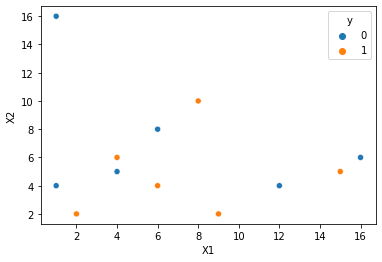

In [135]:
sns.scatterplot(df['X1'], df['X2'], hue=df['y'])

In [136]:
df.shape

(12, 3)

In [137]:
# Assign initial weights to each row i.e 1/n

df['weight'] = 1/df.shape[0]

In [138]:
df

,X1,X2,y,weight
0,1,4,0,0.083333
1,4,6,1,0.083333
2,6,4,1,0.083333
3,2,2,1,0.083333
4,4,5,0,0.083333
5,6,8,0,0.083333
6,8,10,1,0.083333
7,1,16,0,0.083333
8,9,2,1,0.083333
9,12,4,0,0.083333


In [139]:
# Create Decision Stump
from sklearn.tree import DecisionTreeClassifier
dt_model1 = DecisionTreeClassifier(max_depth=1)

In [140]:
df['y']

0     0
1     1
2     1
3     1
4     0
5     0
6     1
7     0
8     1
9     0
10    1
11    0
Name: y, dtype: int64

In [141]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [142]:
X

array([[ 1,  4],
       [ 4,  6],
       [ 6,  4],
       [ 2,  2],
       [ 4,  5],
       [ 6,  8],
       [ 8, 10],
       [ 1, 16],
       [ 9,  2],
       [12,  4],
       [15,  5],
       [16,  6]])

In [143]:
y

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [144]:
dt_model1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[1] <= 3.0\ngini = 0.5\nsamples = 12\nvalue = [6, 6]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.48\nsamples = 10\nvalue = [6, 4]')]

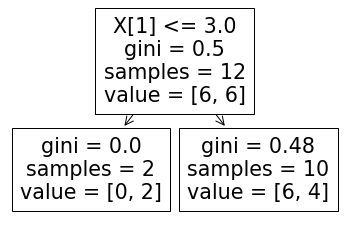

In [145]:
from sklearn.tree import plot_tree
plot_tree(dt_model1)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


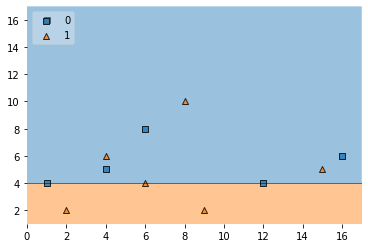

In [146]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y, clf=dt_model1, legend=2)

In [147]:
df['y_pred'] = dt_model1.predict(X)

In [148]:
df

,X1,X2,y,weight,y_pred
0,1,4,0,0.083333,0
1,4,6,1,0.083333,0
2,6,4,1,0.083333,0
3,2,2,1,0.083333,1
4,4,5,0,0.083333,0
5,6,8,0,0.083333,0
6,8,10,1,0.083333,0
7,1,16,0,0.083333,0
8,9,2,1,0.083333,1
9,12,4,0,0.083333,0


In [149]:
# calculate the weight of model i.e alpha
def calculate_model_weight(data):
  error = 0

  for i in range(data.shape[0]):
    if data['y'][i] != data['y_pred'][i]:
      error = error + data['weight'][i]
  return 0.5*np.log((1-error)/(error+0.00001))  # adding small no so that it will not become zero

In [150]:
# error is the sum of weights of all misclassified points

alpha = calculate_model_weight(df)
alpha1 = alpha

In [151]:
# Increase weights in misclassified rows and decrease in correct classified rows

def update_new_weights(df, alpha=alpha):
  if df['y'] == df['y_pred']:
    return df['weight']*np.exp(-alpha)
  else:
    return df['weight']*np.exp(alpha)

In [152]:
df['new_weights'] = df.apply(update_new_weights, axis=1)

In [153]:
df

,X1,X2,y,weight,y_pred,new_weights
0,1,4,0,0.083333,0,0.058926
1,4,6,1,0.083333,0,0.117849
2,6,4,1,0.083333,0,0.117849
3,2,2,1,0.083333,1,0.058926
4,4,5,0,0.083333,0,0.058926
5,6,8,0,0.083333,0,0.058926
6,8,10,1,0.083333,0,0.117849
7,1,16,0,0.083333,0,0.058926
8,9,2,1,0.083333,1,0.058926
9,12,4,0,0.083333,0,0.058926


In [154]:
df['new_weights'].sum()

0.9428090416881261

In [155]:
# to make the sum of all weights as 1 we normalize it
df['normalized_weight'] = df['new_weights']/df['new_weights'].sum()

In [156]:
df['normalized_weight'].sum()

1.0

In [157]:
# find the range of all the weights

df['cumulative_sum_upper'] = np.cumsum(df['normalized_weight'])

In [158]:
df['cumulative_sum_lower'] = df['cumulative_sum_upper'] - df['normalized_weight']

In [159]:
df

,X1,X2,y,weight,y_pred,new_weights,normalized_weight,cumulative_sum_upper,cumulative_sum_lower
0,1,4,0,0.083333,0,0.058926,0.062501,0.062501,0.000000
1,4,6,1,0.083333,0,0.117849,0.124998,0.187499,0.062501
2,6,4,1,0.083333,0,0.117849,0.124998,0.312497,0.187499
3,2,2,1,0.083333,1,0.058926,0.062501,0.374998,0.312497
4,4,5,0,0.083333,0,0.058926,0.062501,0.437499,0.374998
5,6,8,0,0.083333,0,0.058926,0.062501,0.500000,0.437499
6,8,10,1,0.083333,0,0.117849,0.124998,0.624998,0.500000
7,1,16,0,0.083333,0,0.058926,0.062501,0.687499,0.624998
8,9,2,1,0.083333,1,0.058926,0.062501,0.750000,0.687499
9,12,4,0,0.083333,0,0.058926,0.062501,0.812501,0.750000


In [160]:
# create datsets by choosing random numbers within the range

def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):

    a = np.random.random()

    for index, dataFrame in df.iterrows():
      if dataFrame['cumulative_sum_upper'] > a and dataFrame['cumulative_sum_lower'] < a:
        indices.append(index)
  return indices

In [161]:
indices = create_new_dataset(df)

In [162]:
# creating new data frame to pass to next stump
df2 = df.iloc[indices, [0,1,2,3]]

In [163]:
df2

,X1,X2,y,weight
7,1,16,0,0.083333
9,12,4,0,0.083333
2,6,4,1,0.083333
2,6,4,1,0.083333
11,16,6,0,0.083333
5,6,8,0,0.083333
6,8,10,1,0.083333
2,6,4,1,0.083333
3,2,2,1,0.083333
11,16,6,0,0.083333


In [164]:
# Create new Decision stump
X = df2.iloc[:,0:2].values
y = df2.iloc[:,2].values

dt_model2 = DecisionTreeClassifier(max_depth=1)

dt_model2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[1] <= 3.0\ngini = 0.5\nsamples = 12\nvalue = [6, 6]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.48\nsamples = 10\nvalue = [6, 4]')]

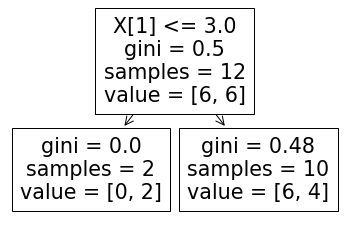

In [165]:
from sklearn.tree import plot_tree
plot_tree(dt_model1)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


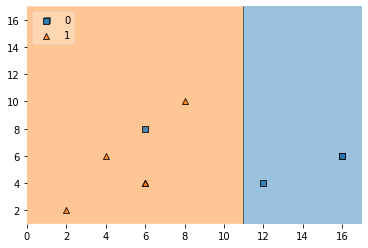

In [166]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y, clf=dt_model2, legend=2)

In [167]:
df2['y_pred'] = dt_model2.predict(X)

In [168]:
df2= df2.reset_index()

In [169]:
df2 = df2.drop(columns=['index'], axis=1)

In [170]:
alpha = calculate_model_weight(df2)
alpha2 = alpha

In [171]:
alpha

0.8046889571170143

In [172]:
df2['new_weights'] = df2.apply(update_new_weights, axis=1)

In [173]:
df2

,X1,X2,y,weight,y_pred,new_weights
0,1,16,0,0.083333,1,0.117849
1,12,4,0,0.083333,0,0.058926
2,6,4,1,0.083333,1,0.058926
3,6,4,1,0.083333,1,0.058926
4,16,6,0,0.083333,0,0.058926
5,6,8,0,0.083333,1,0.117849
6,8,10,1,0.083333,1,0.058926
7,6,4,1,0.083333,1,0.058926
8,2,2,1,0.083333,1,0.058926
9,16,6,0,0.083333,0,0.058926


In [174]:
df2['normalized_weight'] = df2['new_weights']/df2['new_weights'].sum()

In [175]:
df2['cumulative_sum_upper'] = np.cumsum(df2['normalized_weight'])
df2['cumulative_sum_lower'] = df2['cumulative_sum_upper'] - df2['normalized_weight']

In [176]:
df2

,X1,X2,y,weight,y_pred,new_weights,normalized_weight,cumulative_sum_upper,cumulative_sum_lower
0,1,16,0,0.083333,1,0.117849,0.142854,0.142854,0.000000
1,12,4,0,0.083333,0,0.058926,0.071429,0.214283,0.142854
2,6,4,1,0.083333,1,0.058926,0.071429,0.285712,0.214283
3,6,4,1,0.083333,1,0.058926,0.071429,0.357142,0.285712
4,16,6,0,0.083333,0,0.058926,0.071429,0.428571,0.357142
5,6,8,0,0.083333,1,0.117849,0.142854,0.571425,0.428571
6,8,10,1,0.083333,1,0.058926,0.071429,0.642854,0.571425
7,6,4,1,0.083333,1,0.058926,0.071429,0.714283,0.642854
8,2,2,1,0.083333,1,0.058926,0.071429,0.785712,0.714283
9,16,6,0,0.083333,0,0.058926,0.071429,0.857142,0.785712


In [177]:
indices = create_new_dataset(df2)

In [178]:
indices

[0, 9, 4, 1, 0, 8, 7, 11, 4, 1, 8, 8]

In [179]:
df3 = df2.iloc[indices, [0,1,2,3]]

In [180]:
X = df3.iloc[:,0:2].values
y = df3.iloc[:,2].values

dt_model3 = DecisionTreeClassifier(max_depth=1)

dt_model3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[0] <= 9.0\ngini = 0.486\nsamples = 12\nvalue = [7, 5]'),
 Text(0.25, 0.25, 'gini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]')]

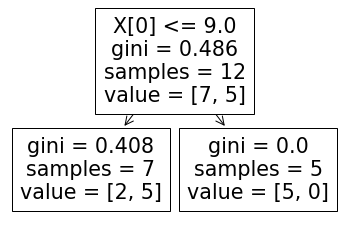

In [181]:
from sklearn.tree import plot_tree
plot_tree(dt_model3)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


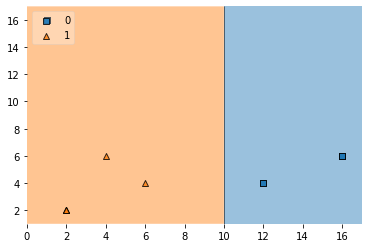

In [182]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y, clf=dt_model3, legend=2)

In [183]:
df3['y_pred'] = dt_model3.predict(X)
df3= df3.reset_index()
df3 = df3.drop(columns=['index'], axis=1)
alpha = calculate_model_weight(df3)
alpha3 = alpha

In [184]:
print(alpha1, alpha2, alpha3)

0.34655859050496823 0.8046889571170143 0.8046889571170143


Prediction based on combined decision stump

In [185]:
# prediction for first row in original dataset with 1, 4 -> 0

dt_model1.predict(np.array([1,4]).reshape(1,2))

array([0])

In [186]:
# model2
dt_model2.predict(np.array([1,4]).reshape(1,2))

array([1])

In [187]:
# model3
dt_model3.predict(np.array([1,4]).reshape(1,2))

array([1])

In [188]:
# based on the above output, we will multiply it will their respective alphas
final_alpha = alpha1*(-1) + alpha2*(-1) + alpha3*(-1)
final_alpha

-1.9559365047389967

In [189]:
np.sign(final_alpha)

-1.0

In [190]:
# prediction for first row in original dataset with 9,2 -> 1

dt_model1.predict(np.array([9,2]).reshape(1,2))

array([1])

In [191]:
dt_model2.predict(np.array([9,2]).reshape(1,2))

array([1])

In [192]:
dt_model3.predict(np.array([9,2]).reshape(1,2))

array([1])

In [193]:
final_alpha = alpha1*(1) + alpha2*(1) + alpha3*(1)
final_alpha

1.9559365047389967

In [194]:
# output
np.sign(final_alpha)

1.0